#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [46]:
first_name= "Amirreza"
last_name= "Velaei"
student_number= "400102222"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [48]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

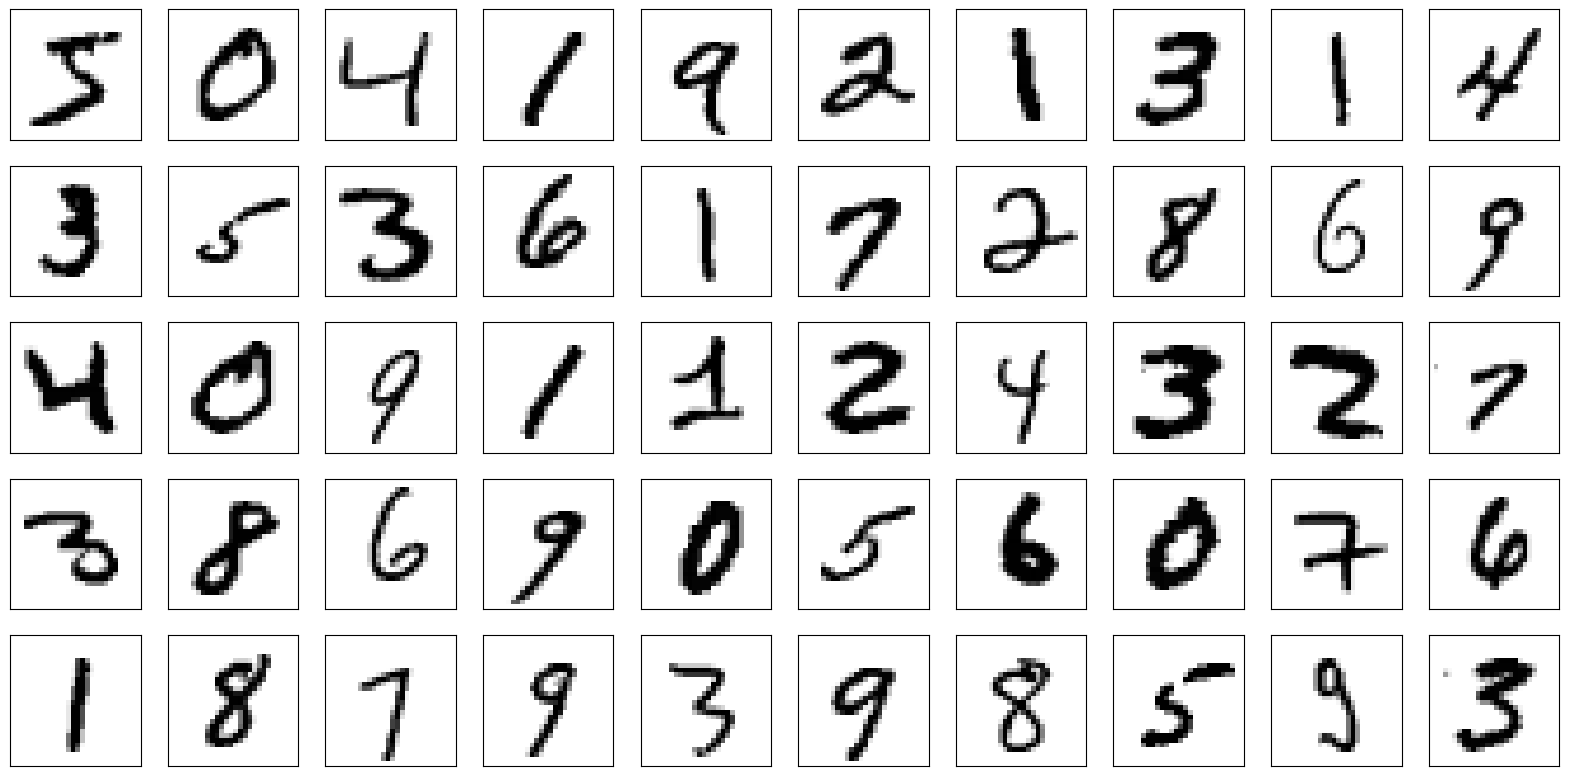

In [49]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images

    fig = plt.figure(figsize=(20, 20))
    for i in range(num_images):
        ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.show()
X = x_train
show_images(50,X)


In [50]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [51]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
#reshape data to 2d array
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
#calculate covariance matrix
cov_matrix = np.cov(x_train.T)
#calculate eigenvalue and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [52]:
explained_variance = 0.9 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
#sort eigenvalues
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]
#calculate total variance
total_variance = sum(eig_vals)
#calculate the number of components that contains the explained_variance of the total variance.
k = 0
for i in range(len(eig_vals)):
    if sum(eig_vals[:i])/total_variance >= explained_variance:
        k = i
        print("k = ",k)
        print("sum(eig_vals[:i])/total_variance = ",sum(eig_vals[:i])/total_variance)
        break
#calculate the compression_ratio
compression_ratio = (x_train.shape[1] - k) / x_train.shape[1]
print("compression_ratio = ",compression_ratio)

k =  87
sum(eig_vals[:i])/total_variance =  0.9001062225762276
compression_ratio =  0.889030612244898


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

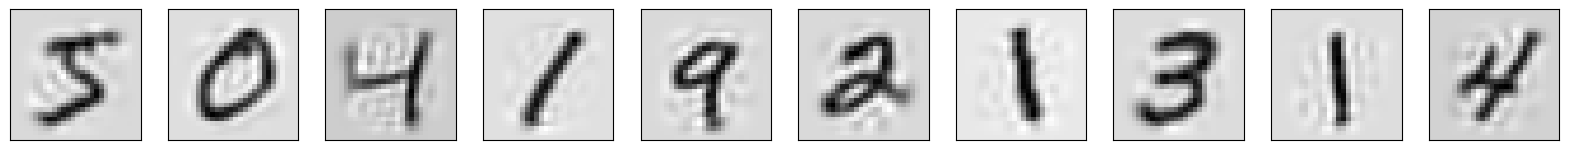

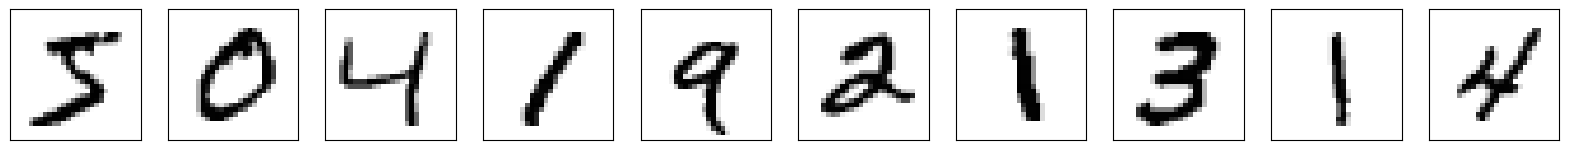

In [53]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#TODO
#select eigen vectors
my_eig_vecs = eig_vecs[:,:k]
#project the data
X_k = np.dot(x_train,my_eig_vecs)
#reproject the data
X_k = np.dot(X_k,my_eig_vecs.T)
#reshape the data
X_k = X_k.reshape(X_k.shape[0], 28, 28)
#plot the data
show_images(10,X_k)
#plot the dimentionally reduced data
#plot the original data
show_images(10,x_train.reshape(x_train.shape[0], 28, 28))

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [54]:
#complete below function using python PCA function
from sklearn.decomposition import PCA
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
  pca = PCA(n_components)
  pca.fit(data)
  return pca.transform(data)
  pass

In [55]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    #split the data to train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #define the model
    model = KNeighborsClassifier(n_neighbors=5)
    #train the model
    model.fit(X_train, y_train)
    #predict the model
    y_pred = model.predict(X_test)
    #calculate the accuracy
    acc = accuracy_score(y_test, y_pred)
    return acc

In [56]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO

acc_list, pc_list = [], []
for pc in range(2,101):
    #TODO
    #project the data
    X_k = do_pca(pc,x_train)
    #calculate the accuracy
    acc = ML_model(X_k,y_train)
    #append the accuracy and number of components to list
    acc_list.append(acc)
    pc_list.append(pc)
    print("pc = ",pc," acc = ",acc)


pc =  2  acc =  0.41383333333333333
pc =  3  acc =  0.47883333333333333
pc =  4  acc =  0.6200833333333333
pc =  5  acc =  0.7415
pc =  6  acc =  0.8318333333333333
pc =  7  acc =  0.87375
pc =  8  acc =  0.9045
pc =  9  acc =  0.9159166666666667
pc =  10  acc =  0.9315833333333333
pc =  11  acc =  0.93875
pc =  12  acc =  0.9474166666666667
pc =  13  acc =  0.9543333333333334
pc =  14  acc =  0.9585833333333333
pc =  15  acc =  0.9575833333333333
pc =  16  acc =  0.9640833333333333
pc =  17  acc =  0.9651666666666666
pc =  18  acc =  0.9689166666666666
pc =  19  acc =  0.9695
pc =  20  acc =  0.9670833333333333
pc =  21  acc =  0.9715
pc =  22  acc =  0.9731666666666666
pc =  23  acc =  0.9709166666666667
pc =  24  acc =  0.9740833333333333
pc =  25  acc =  0.9748333333333333
pc =  26  acc =  0.975
pc =  27  acc =  0.9755
pc =  28  acc =  0.9756666666666667
pc =  29  acc =  0.97475
pc =  30  acc =  0.97725
pc =  31  acc =  0.97625
pc =  32  acc =  0.9766666666666667
pc =  33  acc =  0

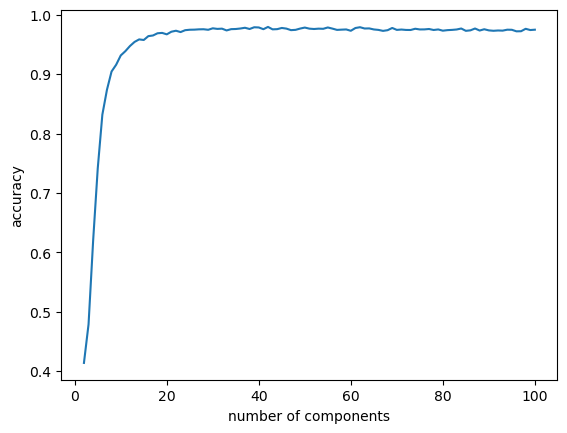

In [59]:
#plot the accuracy based on components.
#TODO
plt.plot(pc_list,acc_list)
plt.xlabel("number of components")
plt.ylabel("accuracy")
plt.show()

In [61]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
max_acc = max(acc_list)
max_pc = pc_list[acc_list.index(max_acc)]
print("max_acc = ",max_acc)
print("max_pc = ",max_pc)


max_acc =  0.9795833333333334
max_pc =  42
